# Practice Programming Assignment: swrl Lesson 2: Simulation

One of the great advantages of using a statistical programming language like R is its vast collection of tools for simulating random numbers.

This lesson assumes familiarity with a few common probability distributions, but these topics will only be discussed with respect to random number generation. Even if you have no prior experience with these concepts, you should be able to complete the lesson and understand the main ideas.

The first function we'll use to generate random numbers is sample(). Use ?sample to pull up the documentation.

In [1]:
?sample

sample                  package:base                   R Documentation

_R_a_n_d_o_m _S_a_m_p_l_e_s _a_n_d _P_e_r_m_u_t_a_t_i_o_n_s

_D_e_s_c_r_i_p_t_i_o_n:

     ‘sample’ takes a sample of the specified size from the elements of
     ‘x’ using either with or without replacement.

_U_s_a_g_e:

     sample(x, size, replace = FALSE, prob = NULL)
     
     sample.int(n, size = n, replace = FALSE, prob = NULL,
                useHash = (n > 1e+07 && !replace && is.null(prob) && size <= n/2))
     
_A_r_g_u_m_e_n_t_s:

       x: either a vector of one or more elements from which to choose,
          or a positive integer.  See ‘Details.’

       n: a positive number, the number of items to choose from.  See
          ‘Details.’

    size: a non-negative integer giving the number of items to choose.

 replace: should sampling be with replacement?

    prob: a vector of probability weights for obtaining the elements of
          the vector

Let's simulate rolling four six-sided dice: sample(1:6, 4, replace = TRUE).

In [2]:
sample(1:6, 4, replace=TRUE)

[1] 6 1 1 6

Now repeat the command to see how your result differs. (The probability of rolling the exact same result is (1/6)^4 = 0.00077, which is pretty small!)

In [3]:
sample(1:6, 4, replace=TRUE)

[1] 1 3 4 2

sample(1:6, 4, replace = TRUE) instructs R to randomly select four numbers between 1 and 6, WITH replacement. Sampling with replacement simply means that each number is "replaced" after it is selected, so that the same number can show up more than once. This is what we want here, since what you roll on one die shouldn't affect what you roll on any of the others.

Now sample 10 numbers between 1 and 20, WITHOUT replacement. To sample without replacement, simply leave off the 'replace' argument.

In [4]:
sample(1:20, 10)

[1]  7 18 19  2  4  8 17 16 12  1

Since the last command sampled without replacement, no number appears more than once in the output.

LETTERS is a predefined variable in R containing a vector of all 26 letters of the English alphabet. Take a look at it now.

In [5]:
LETTERS

[1] "A" "B" "C" "D" "E" "F" "G" "H" "I" "J" "K" "L" "M" "N" "O" "P" "Q" "R" "S"
[20] "T" "U" "V" "W" "X" "Y" "Z"

The sample() function can also be used to permute, or rearrange, the elements of a vector. For example, try sample(LETTERS) to permute all 26 letters of the English alphabet.

In [6]:
sample(LETTERS)

[1] "Y" "I" "L" "O" "S" "U" "B" "N" "D" "Z" "A" "R" "Q" "H" "C" "G" "P" "M" "K"
[20] "V" "F" "T" "J" "E" "X" "W"

This is identical to taking a sample of size 26 from LETTERS, without replacement. When the 'size' argument to sample() is not specified, R takes a sample equal in size to the vector from which you are sampling.

Now, suppose we want to simulate 100 flips of an unfair two-sided coin. This particular coin has a 0.3 probability of landing 'tails' and a 0.7 probability of landing 'heads'.

Let the value 0 represent tails and the value 1 represent heads. Use sample() to draw a sample of size 100 from the vector c(0,1), with replacement. Since the coin is unfair, we must attach specific probabilities to the values 0 (tails) and 1 (heads) with a fourth argument, prob = c(0.3, 0.7). Assign the result to a new variable called flips.

In [7]:
flips <-sample(x=c(0, 1), size=100, replace=TRUE, prob=c(0.3, 0.7))

View the contents of the flips variable.

In [8]:
flips

[1] 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1
 [38] 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0
 [75] 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 0 1

Since we set the probability of landing heads on any given flip to be 0.7, we'd expect approximately 70 of our coin flips to have the value 1. Count the actual number of 1s contained in flips using the sum() function.

In [9]:
sum(flips)

[1] 78

A coin flip is a binary outcome (0 or 1) and we are performing 100 independent trials (coin flips), so we can use rbinom() to simulate a binomial random variable. Pull up the documentation for rbinom() using ?rbinom.

In [10]:
?rbinom

Binomial                 package:stats                 R Documentation

_T_h_e _B_i_n_o_m_i_a_l _D_i_s_t_r_i_b_u_t_i_o_n

_D_e_s_c_r_i_p_t_i_o_n:

     Density, distribution function, quantile function and random
     generation for the binomial distribution with parameters ‘size’
     and ‘prob’.

     This is conventionally interpreted as the number of ‘successes’ in
     ‘size’ trials.

_U_s_a_g_e:

     dbinom(x, size, prob, log = FALSE)
     pbinom(q, size, prob, lower.tail = TRUE, log.p = FALSE)
     qbinom(p, size, prob, lower.tail = TRUE, log.p = FALSE)
     rbinom(n, size, prob)
     
_A_r_g_u_m_e_n_t_s:

    x, q: vector of quantiles.

       p: vector of probabilities.

       n: number of observations. If ‘length(n) > 1’, the length is
          taken to be the number required.

    size: number of trials (zero or more).

    prob: probability of success on each trial.

log, log.p: logical; if TRUE, probabilities p are given a

Each probability distribution in R has an r*** function (for "random"), a d*** function (for "density"), a p*** (for "probability"), and q*** (for "quantile"). We are most interested in the r*** functions in this lesson, but I encourage you to explore the others on your own.

A binomial random variable represents the number of 'successes' (heads) in a given number of independent 'trials' (coin flips). Therefore, we can generate a single random variable that represents the number of heads in 100 flips of our unfair coin using rbinom(1, size = 100, prob = 0.7). Note that you only specify the probability of 'success' (heads) and NOT the probability of 'failure' (tails). Try it now.

In [11]:
rbinom(1, size=100, prob=0.7)

[1] 70

Equivalently, if we want to see all of the 0s and 1s, we can request 100 observations, each of size 1, with success probability of 0.7. Give it a try, assigning the result to a new variable called flips2.

In [12]:
flips2 <- rbinom(n=100, size=1, prob=0.7)

View the contents of flips2.

In [13]:
flips2

[1] 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1
 [38] 0 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0
 [75] 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1

Now use sum() to count the number of 1s (heads) in flips2. It should be close to 70!

In [14]:
sum(flips2)

[1] 75

Similar to rbinom(), we can use R to simulate random numbers from many other probability distributions. Pull up the documentation for rnorm() now.

In [15]:
?rnorm

Normal                  package:stats                  R Documentation

_T_h_e _N_o_r_m_a_l _D_i_s_t_r_i_b_u_t_i_o_n

_D_e_s_c_r_i_p_t_i_o_n:

     Density, distribution function, quantile function and random
     generation for the normal distribution with mean equal to ‘mean’
     and standard deviation equal to ‘sd’.

_U_s_a_g_e:

     dnorm(x, mean = 0, sd = 1, log = FALSE)
     pnorm(q, mean = 0, sd = 1, lower.tail = TRUE, log.p = FALSE)
     qnorm(p, mean = 0, sd = 1, lower.tail = TRUE, log.p = FALSE)
     rnorm(n, mean = 0, sd = 1)
     
_A_r_g_u_m_e_n_t_s:

    x, q: vector of quantiles.

       p: vector of probabilities.

       n: number of observations. If ‘length(n) > 1’, the length is
          taken to be the number required.

    mean: vector of means.

      sd: vector of standard deviations.

log, log.p: logical; if TRUE, probabilities p are given as log(p).

lower.tail: logical; if TRUE (default), probabilities are P[X <=

The standard normal distribution has mean 0 and standard deviation 1. As you can see under the 'Usage' section in the documentation, the default values for the 'mean' and 'sd' arguments to rnorm() are 0 and 1, respectively. Thus, rnorm(10) will generate 10 random numbers from a standard normal distribution. Give it a try.

In [16]:
rnorm(10)

[1] -0.3974214514 -0.6132015049  0.9659080777  0.0570969431 -0.0740261475
 [6] -0.5270840068  1.2769950102  0.0004201723  0.7705416407 -1.5025306069

Now do the same, except with a mean of 100 and a standard deviation of 25.

In [17]:
rnorm(n=10, mean=100, sd=25)

[1]  75.04163  77.12456  81.96571  73.03452 144.58198  83.71895 136.63186
 [8] 136.13839 119.80038 106.12320

Finally, what if we want to simulate 100 *groups* of random numbers, each containing 5 values generated from a Poisson distribution with mean 10? Let's start with one group of 5 numbers, then I'll show you how to repeat the operation 100 times in a convenient and compact way.

Generate 5 random values from a Poisson distribution with mean 10. Check out the documentation for rpois() if you need help.

In [18]:
rpois(n=5, lambda=10)

[1] 11  7  8 10 10

Now use replicate(100, rpois(5, 10)) to perform this operation 100 times. Store the result in a new variable called my_pois.

In [19]:
my_pois <- replicate(100, rpois(5, 10))

Take a look at the contents of my_pois.

In [20]:
my_pois

15,6,8,8,6,9,4,7,8,8,⋯,4,9,13,9,9,8,10,15,11,8
10,8,16,9,9,9,6,12,15,12,⋯,18,10,6,16,5,9,10,15,9,14
8,13,10,4,12,7,7,5,13,10,⋯,8,8,13,10,13,14,8,12,13,12
10,10,15,9,11,10,11,10,10,14,⋯,14,7,11,8,14,18,12,18,11,7
8,5,14,13,15,10,13,15,7,17,⋯,10,15,8,6,11,14,7,9,10,8


replicate() created a matrix, each column of which contains 5 random numbers generated from a Poisson distribution with mean 10. Now we can find the mean of each column in my_pois using the colMeans() function. Store the result in a variable called cm.

In [21]:
cm <- colMeans(my_pois)

And let's take a look at the distribution of our column means by plotting a histogram with hist(cm).

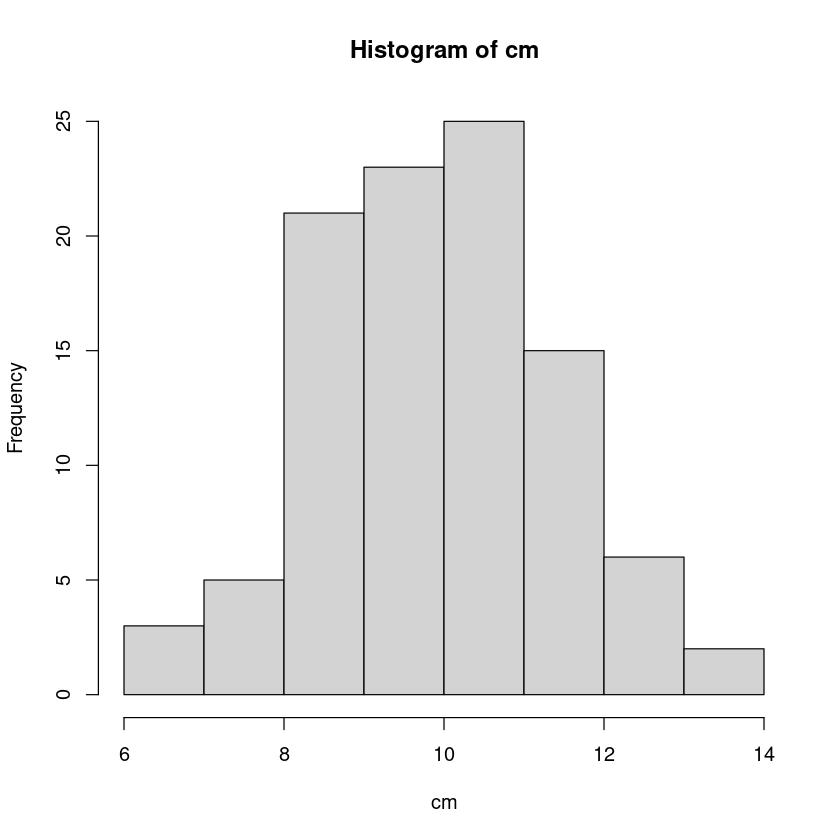

In [22]:
hist(cm)

Looks like our column means are almost normally distributed, right? That's the Central Limit Theorem at work, but that's a lesson for another day!

All of the standard probability distributions are built into R, including exponential (rexp()), chi-squared (rchisq()), gamma (rgamma()), .... Well, you see the pattern.

Simulation is practically a field of its own and we've only skimmed the surface of what's possible. I encourage you to explore these and other functions further on your own.